In [2]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from scipy.signal import find_peaks, convolve
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, parent_dir)
import matplotlibcolors
plt.style.use(parent_dir + '/matplotlibrc')

%matplotlib widget

In [3]:
files = glob('./setup/*.npy')
dark_freqs, dark_s21 = np.load(files[0])
dark_s21 -= dark_s21[0]
files

['./setup\\VNAsweep_1st_cooldown_labview.npy',
 './setup\\VNAsweep_2nd_cooldown.npy',
 './setup\\VNAsweep_3rd_cooldown.npy',
 './setup\\VNAsweep_4th_cooldown.npy']

36


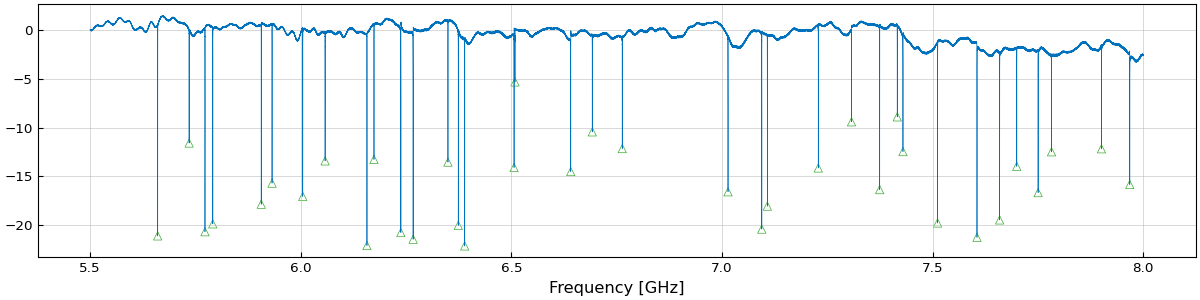

In [3]:
mph = 39
mpp = 3
locs, props = find_peaks(-dark_s21, height=-mph, prominence=mpp)
heights = props['peak_heights']

dark_f0s = dark_freqs[locs]
dark_s21_mins = dark_s21[locs]
fig, ax = plt.subplot_mosaic('b', sharex=True, figsize=(12, 3), constrained_layout=True)
ax['b'].plot(dark_freqs, dark_s21, lw=.5)

ax['b'].scatter(dark_f0s, dark_s21_mins, marker='^', c='None', edgecolor='g')
ax['b'].set_xlabel('Frequency [GHz]')
print(len(locs))

1.934415769785097e-06
2.1290651631580127e-06
2.759313528697933e-06


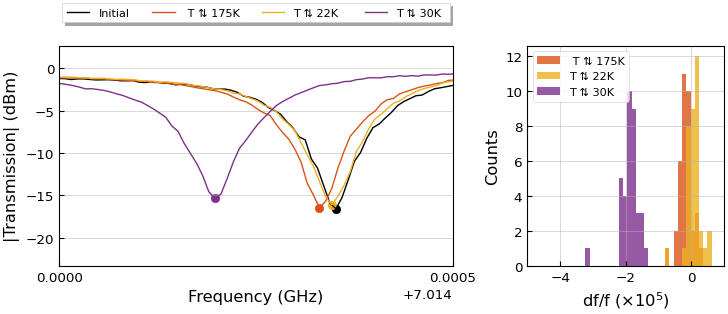

In [9]:
labels = [' T ⇅ 175K', 'T ⇅ 22K ', 'T ⇅ 30K ']
colors = ['o', 'y', 'p']
fig, ax = plt.subplot_mosaic('aab', constrained_layout=True, figsize=(18.5/2.54, 8/2.54))
ax['a'].plot(dark_freqs, dark_s21, label='Initial', c='k')
ax['a'].scatter(dark_f0s, dark_s21_mins, c='k')
bins = np.linspace(-4, 1, 40)
for i, file in enumerate(files[1:]):
    freqs, s21 = np.load(file)
    s21 -= s21[0] - dark_s21[0]
    locs, props = find_peaks(-s21, height=-mph, prominence=mpp)
    f0s = freqs[locs]
    s21_mins = s21[locs]
    shift = np.mean(f0s - dark_f0s)
    shift = 0
    scatter = (f0s - (dark_f0s)) / (dark_f0s)
    ax['a'].plot((freqs-shift), s21, label=labels[i], c=colors[i])
    ax['a'].scatter((f0s-shift), s21_mins, c=colors[i])
    ax['b'].hist(scatter*1e5, bins=bins, alpha=0.8, facecolor=colors[i], label=labels[i])
    print(scatter.std())
ax['a'].set_xlim((7.014, 7.0145))
ax['a'].set_xticks((7.014, 7.0145))
ax['a'].set_xlabel('Frequency (GHz)')
ax['a'].set_ylabel('|Transmission| (dBm)')
ax['a'].legend(loc='center', bbox_to_anchor=(0.5, 1.15), ncol=4, fancybox=False, shadow=True)
ax['b'].set_xlim(-5, 1)
ax['b'].legend()
ax['b'].set_xlabel('df/f ($\\times 10^5$)')
ax['b'].set_ylabel('Counts')
plt.savefig('setup_scatter.svg', dpi=300)